In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [3]:
data= pd.read_csv("insurance_data\insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


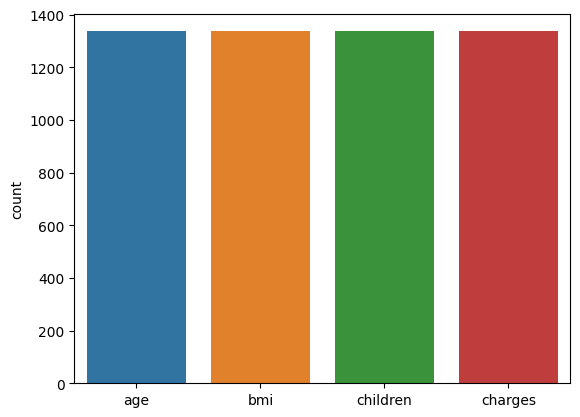

In [10]:
sns.countplot(data=data)
plt.show()

In [11]:
LabelEncoder= preprocessing.LabelEncoder()

In [12]:
data['sex']=LabelEncoder.fit_transform(data['sex'])
data['region']=LabelEncoder.fit_transform(data['region'])
data['smoker']=LabelEncoder.fit_transform(data['smoker'])

In [13]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<AxesSubplot:>

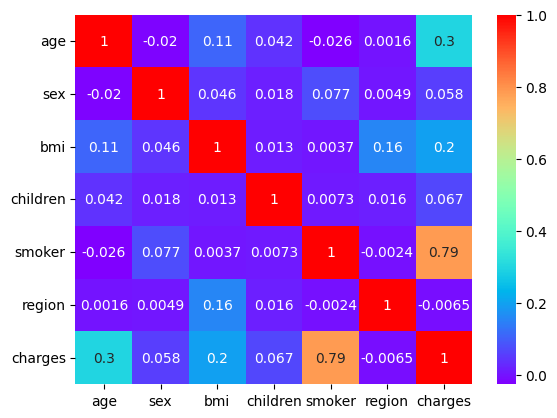

In [14]:
sns.heatmap(data.corr(),annot=True,cmap="rainbow")

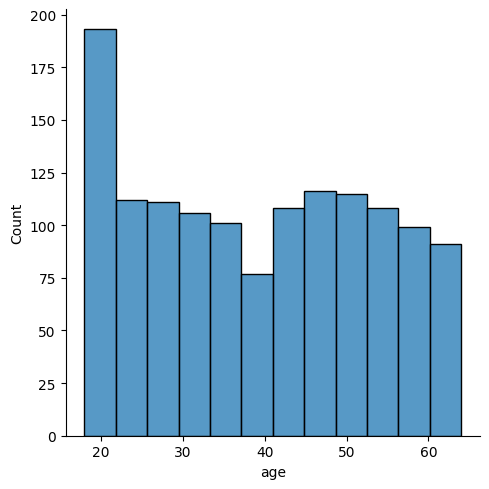

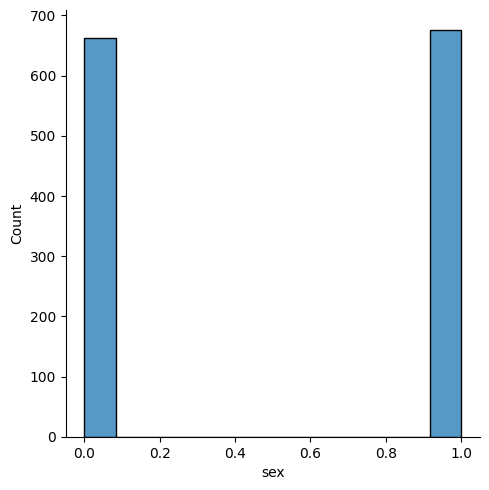

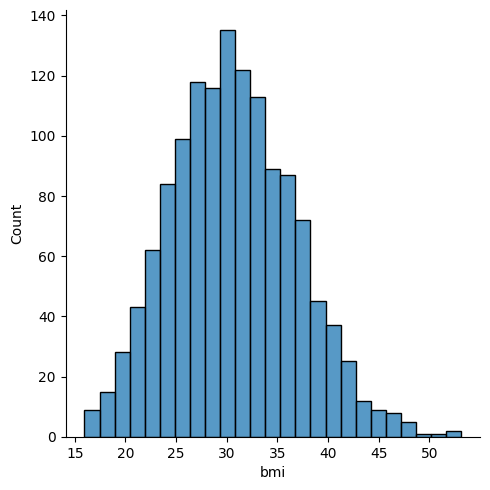

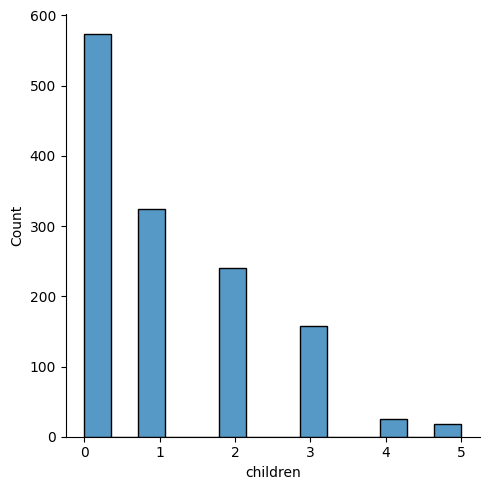

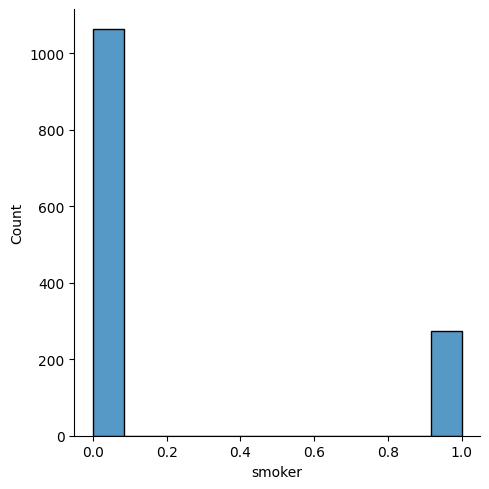

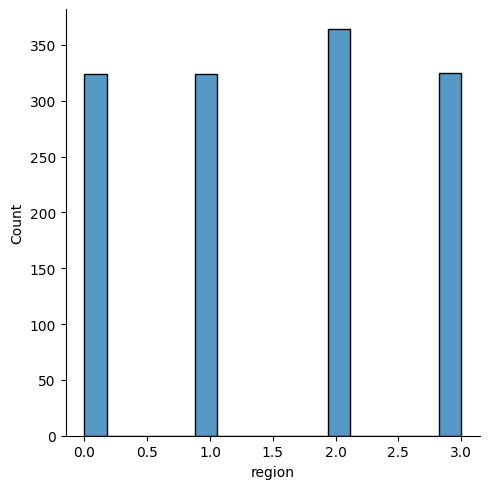

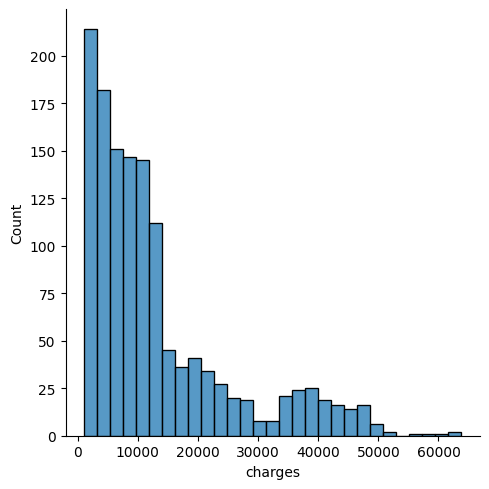

In [15]:
for i in data:
    sns.displot(data[i])
plt.show()

In [ ]:
#steps for ml :
'''
transform data
get x,y 
train test split
scale the data (preprocessing)
get the mean abs and root

select the algo 

run prediction on new data 

'''

In [121]:
# MACHINE LEARNING
X=data.drop(columns=['charges'])
y=data['charges']

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [124]:
scaler=StandardScaler()

In [125]:
TrainX_Scaler= scaler.fit_transform(X_train)
TestX_Scaler= scaler.fit_transform(X_test)

In [127]:
def modelresults(predictions):
    print("mean abs is {}".format(mean_absolute_error(y_test,predictions)))
    print("root mean squared is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [128]:
lr=LinearRegression()
lr.fit(TrainX_Scaler,y_train)
predres=lr.predict(TestX_Scaler)
modelresults(predres)
#bad model

mean abs is 4250.950881568448
root mean squared is 5927.675870130306


In [129]:
svrmodel = SVR()
param_gridsvr = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(TrainX_Scaler, y_train)
print("Best parameters for model is {}".format(gridsvr.best_params_))
predres=gridsvr.predict(TestX_Scaler)
modelresults(predres)

#bad model

Best parameters for model is {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
mean abs is 7052.100773684816
root mean squared is 10851.60385882172


In [140]:
rf=RandomForestRegressor()

param_gridrfr = {
    'bootstrap': [True], 
    'max_depth': [5, 10, 15], 
    'max_features': ['auto', 'log2'], 
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gridrfr = GridSearchCV(rf, param_gridrfr)
gridrfr.fit(TrainX_Scaler, y_train)

predres=gridrfr.predict(TestX_Scaler)
modelresults(predres)
#selected model

mean abs is 2607.4818873023564
root mean squared is 4600.048335407299


In [141]:
new=np.array([39,0,30,1,0,1])
gridrfr.predict(new.reshape(1,-1))

array([17851.19373858])